In [1]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
class Sigmoid():
    """Sigmoid function
    """
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))
    
    def grad(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

def normalize(X, axis=-1, order=2):
    """Normalise the dataset (unit norm)
        Axis:0 => Each feature(column) is normalised to unit norm
        Axis:1 => Each sample(row) is normalised to unit norm
        X = X / sqrt(|X|^2)
    """
    norm = np.atleast_1d(np.linalg.norm(X, ord=order, axis=axis))
    norm[norm == 0] = 1
    return X / np.expand_dims(norm, axis=axis)

def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred, axis=0) / len(y_true)

In [33]:
class LogisticRegression():
    """Logistic Regression Classifier
    Parameters
    ----------
    n_iterations: int
        Number of gd iterations
    learning_rate: float
        Learning rate for gradient descent
    gradient_descent: boolean
        Flag to enable/disable gradient_descent
    """
    def __init__(self, n_iterations=100, learning_rate=0.0001, gradient_descent=True):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()
    
    def _initialise_parameters(self, n_features):
        """Initialise parameters
        """
        limit = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features,1))

    def fit(self, x, y):
        """Fit parameters of logistic regression model
        """
        n_features = x.shape[1]
        self._initialise_parameters(n_features)
        self.training_errors = []

        for i in range(self.n_iterations):
            y_pred = self.sigmoid(x @ self.w)
            if self.gradient_descent:
                y_pred_ones = y_pred[y == 1]
                y_pred_zeros = y_pred[y == 0]
                loss =  - np.sum(np.log(y_pred_ones)) - np.sum(np.log(1 - y_pred_zeros))
                self.training_errors.append(loss)
                grad_w = - x.T @ (y - y_pred)
                self.w -= self.learning_rate * grad_w
            else:
                # Batch optimisation [ TODO - What's this ?]
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = make_diagonal(self.sigmoid.gradient(x @ self.w))
                self.param = np.linalg.pinv(x.T @ diag_gradient @ X) @ x.T @ (diag_gradient @ (x @ self.param) + y - y_pred)

    
    def predict(self, x):
        """Output class label of logistic regression model
        after having fit parameters
        """
        return np.round(self.sigmoid(x @ self.w)).astype(int)
    
    def predict_proba(self, x):
        """Output class probability of logistic regression model
        after having fit parameters
        """
        return self.sigmoid(x @ self.w)


In [40]:
# Load, normalise data
# Use 2 of the 3 iris dataset classes
data = datasets.load_iris()
x = normalize(data.data[data.target != 0], axis=0, order=2)
y = data.target[data.target != 0]
y[data == 1] = 0
y[data == 2] = 1

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
# Reshape
y = y.reshape(y.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


In [46]:
n_iterations = 500
learning_rate = 0.01
gradient_descent = True
clf = LogisticRegression(n_iterations=n_iterations, learning_rate=learning_rate,
                         gradient_descent=gradient_descent)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[0.54545455]


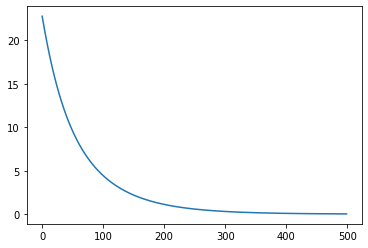

In [47]:
plt.plot(clf.training_errors)